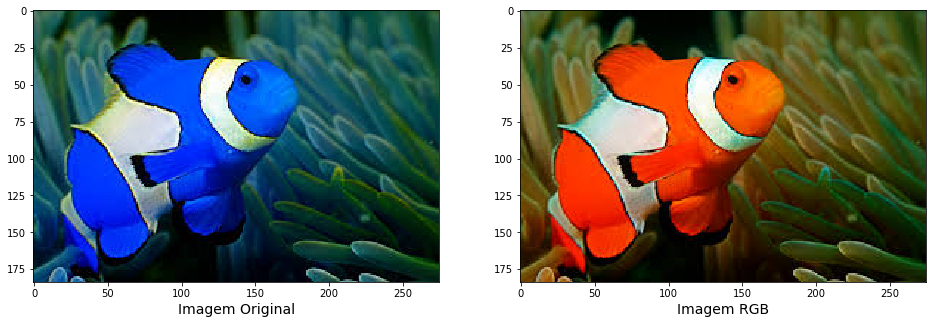

In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import os

img = cv2.imread(os.path.join(os.getcwd(),'nemo0.jpg'))
img_RGB = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

#Plot das imagens Original e em RGB
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, constrained_layout=False, figsize=(16,9))
ax1.imshow(img)
ax1.set_xlabel("Imagem Original", fontsize=14)
ax2.imshow(img_RGB)
ax2.set_xlabel("Imagem RGB", fontsize=14)
plt.show()



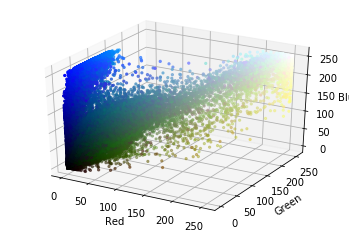

In [3]:
#Vizualizacao do Espaco em RGB
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm, colors

r,g,b = cv2.split(img)
fig = plt.figure()
axis = fig.add_subplot(1,1,1, projection="3d")
pixel_colors = img.reshape((np.shape(img)[0]*np.shape(img)[1], 3))
norm = colors.Normalize(vmin=-1., vmax=1.)
norm.autoscale(pixel_colors)
pixel_colors = norm(pixel_colors).tolist()
axis.scatter(r.flatten(), g.flatten(), b.flatten(), facecolors=pixel_colors, marker=".")
axis.set_xlabel("Red")
axis.set_ylabel("Green")
axis.set_zlabel("Blue")
plt.show()



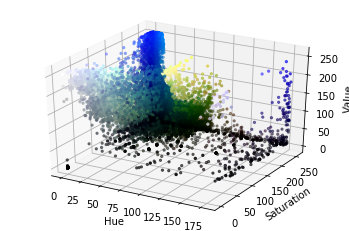

In [4]:
#Vizualizacao do Espaco em HSV

hsv_img = cv2.cvtColor(img_RGB, cv2.COLOR_RGB2HSV)

h,s,v = cv2.split(hsv_img)
fig = plt.figure()
axis = fig.add_subplot(1,1,1, projection="3d")
axis.scatter(h.flatten(), s.flatten(), v.flatten(), facecolors=pixel_colors, marker=".")
axis.set_xlabel("Hue")
axis.set_ylabel("Saturation")
axis.set_zlabel("Value")
plt.show()



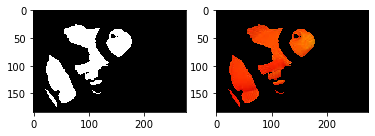

In [5]:
#Threshold baseado nos niveis de laranja
light_orange = (1, 190, 200)
dark_orange = (18, 255, 255)

mask = cv2.inRange(hsv_img, light_orange, dark_orange)
result = cv2.bitwise_and(img_RGB, img_RGB, mask=mask)
plt.subplot(1, 2, 1)
plt.imshow(mask, cmap="gray")
plt.subplot(1, 2, 2)
plt.imshow(result)
plt.show()



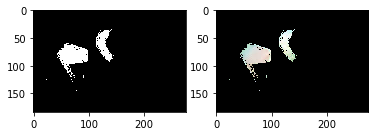

In [6]:
#Segunda máscara para as partes azuis
light_white = (0, 0, 200)
dark_white = (145, 60, 255)

mask_white = cv2.inRange(hsv_img, light_white, dark_white)
result_white = cv2.bitwise_and(img_RGB, img_RGB, mask=mask_white)
plt.subplot(1, 2, 1)
plt.imshow(mask_white, cmap="gray")
plt.subplot(1, 2, 2)
plt.imshow(result_white)
plt.show()



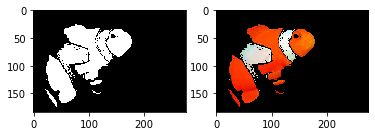

In [7]:
#Adicao das máscaras
final_mask = mask + mask_white
final_result = cv2.bitwise_and(img_RGB, img_RGB, mask=final_mask)
plt.subplot(1, 2, 1)
plt.imshow(final_mask, cmap="gray")
plt.subplot(1, 2, 2)
plt.imshow(final_result)
plt.show()



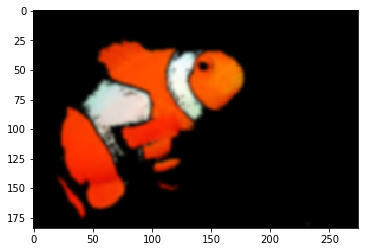

In [9]:
#Melhorando a imagem

blur = cv2.GaussianBlur(final_result, (7,7), 0)
plt.imshow(blur)
plt.show()

In [13]:
#Testando a segmentacao de cores em outras imagens
path  = '/EstudosVisaoComp/Color Segmetation/'

imgs = []
for i in range(6):
    imag = cv2.imread(path + str(i) + ".jpg")
    imag_cvt = cv2.cvtColor(imag, cv2.COLOR_BGR2RGB)
    imgs.append(imag_cvt)



error: OpenCV(4.3.0) /io/opencv/modules/imgproc/src/color.cpp:182: error: (-215:Assertion failed) !_src.empty() in function 'cvtColor'
